# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [16]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 648


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']["all"]
        city_wind = city_weather['wind']["speed"]
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tanete
Processing Record 2 of Set 1 | mahebourg
Processing Record 3 of Set 1 | port augusta
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | constitucion
Processing Record 6 of Set 1 | hasaki
Processing Record 7 of Set 1 | itarema
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | sicamous
Processing Record 12 of Set 1 | pevek
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | pangnirtung
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | norman wells
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | pisco
Processing Reco

Processing Record 40 of Set 4 | lavrentiya
Processing Record 41 of Set 4 | turka
Processing Record 42 of Set 4 | lebu
Processing Record 43 of Set 4 | hovd
Processing Record 44 of Set 4 | belyy yar
Processing Record 45 of Set 4 | ossora
Processing Record 46 of Set 4 | enshi
Processing Record 47 of Set 4 | lasa
Processing Record 48 of Set 4 | jacksonville
Processing Record 49 of Set 4 | gamba
Processing Record 0 of Set 5 | mareeba
Processing Record 1 of Set 5 | severnoye
Processing Record 2 of Set 5 | upernavik
Processing Record 3 of Set 5 | kieta
Processing Record 4 of Set 5 | sobolevo
Processing Record 5 of Set 5 | roald
Processing Record 6 of Set 5 | tual
Processing Record 7 of Set 5 | ouesso
Processing Record 8 of Set 5 | roebourne
Processing Record 9 of Set 5 | provideniya
Processing Record 10 of Set 5 | saleaula
City not found. Skipping...
Processing Record 11 of Set 5 | ponta do sol
Processing Record 12 of Set 5 | la rioja
Processing Record 13 of Set 5 | amol
Processing Record 14 

Processing Record 31 of Set 8 | lorengau
Processing Record 32 of Set 8 | springbok
Processing Record 33 of Set 8 | pa sang
Processing Record 34 of Set 8 | buraydah
Processing Record 35 of Set 8 | tiarei
Processing Record 36 of Set 8 | moju
Processing Record 37 of Set 8 | olinda
Processing Record 38 of Set 8 | panama city
Processing Record 39 of Set 8 | vila franca do campo
Processing Record 40 of Set 8 | kokstad
Processing Record 41 of Set 8 | vardo
Processing Record 42 of Set 8 | haicheng
Processing Record 43 of Set 8 | luganville
Processing Record 44 of Set 8 | hithadhoo
Processing Record 45 of Set 8 | solnechnyy
Processing Record 46 of Set 8 | huesca
Processing Record 47 of Set 8 | lompoc
Processing Record 48 of Set 8 | dibaya
City not found. Skipping...
Processing Record 49 of Set 8 | tateyama
Processing Record 0 of Set 9 | leh
Processing Record 1 of Set 9 | lucea
Processing Record 2 of Set 9 | nioro
Processing Record 3 of Set 9 | pacifica
Processing Record 4 of Set 9 | vila praia 

Processing Record 21 of Set 12 | bilibino
Processing Record 22 of Set 12 | slavuta
Processing Record 23 of Set 12 | canico
Processing Record 24 of Set 12 | chachapoyas
Processing Record 25 of Set 12 | westport
Processing Record 26 of Set 12 | takoradi
Processing Record 27 of Set 12 | shaunavon
Processing Record 28 of Set 12 | gizo
Processing Record 29 of Set 12 | cermik
Processing Record 30 of Set 12 | cilegon
Processing Record 31 of Set 12 | merauke
Processing Record 32 of Set 12 | granja
Processing Record 33 of Set 12 | grindavik
Processing Record 34 of Set 12 | melton
Processing Record 35 of Set 12 | rajgir
Processing Record 36 of Set 12 | george town
Processing Record 37 of Set 12 | agadir
Processing Record 38 of Set 12 | heyang
Processing Record 39 of Set 12 | changping
Processing Record 40 of Set 12 | belaya gora
Processing Record 41 of Set 12 | henties bay
Processing Record 42 of Set 12 | peleduy
Processing Record 43 of Set 12 | havre
Processing Record 44 of Set 12 | igrim
Proce

In [19]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&"
city = "houston"


# Create endpoint URL with each city
city_url = url + "appid=" + weather_api_key + "&q=" + city
    

city_weather = requests.get(city_url).json()
print(city_weather)



{'coord': {'lon': -95.3633, 'lat': 29.7633}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 27.58, 'feels_like': 30.45, 'temp_min': 26.05, 'temp_max': 28.88, 'pressure': 1009, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 200}, 'clouds': {'all': 40}, 'dt': 1680539236, 'sys': {'type': 2, 'id': 2001415, 'country': 'US', 'sunrise': 1680523715, 'sunset': 1680568835}, 'timezone': -18000, 'id': 4699066, 'name': 'Houston', 'cod': 200}


In [5]:
city_weather['main']['temp']

27.3

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
#city_data_df
# Show Record Count
city_data_df.count()

City          599
Lat           599
Lng           599
Max Temp      599
Humidity      599
Cloudiness    599
Wind Speed    599
Country       599
Date          599
dtype: int64

In [23]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tanete,-3.9443,119.7848,23.98,94,81,1.04,ID,1680539277
1,mahebourg,-20.4081,57.7000,26.81,83,40,2.57,MU,1680539733
2,port augusta,-32.5000,137.7667,17.08,32,5,1.73,AU,1680539277
3,punta arenas,-53.1500,-70.9167,16.06,47,0,8.23,CL,1680539733
4,constitucion,-35.3333,-72.4167,19.94,54,100,6.61,CL,1680539733


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tanete,-3.9443,119.7848,23.98,94,81,1.04,ID,1680539277
1,mahebourg,-20.4081,57.7000,26.81,83,40,2.57,MU,1680539733
2,port augusta,-32.5000,137.7667,17.08,32,5,1.73,AU,1680539277
3,punta arenas,-53.1500,-70.9167,16.06,47,0,8.23,CL,1680539733
4,constitucion,-35.3333,-72.4167,19.94,54,100,6.61,CL,1680539733


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

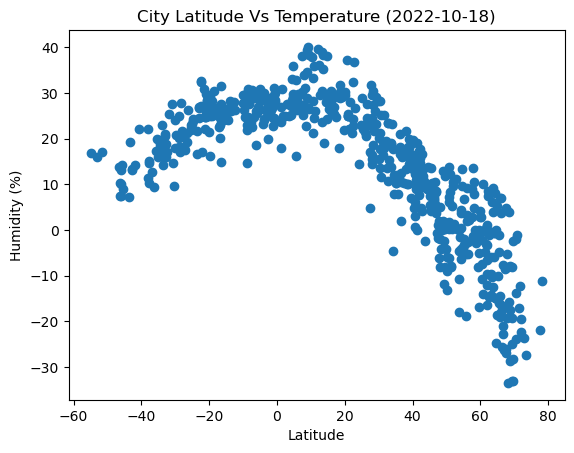

<Figure size 640x480 with 0 Axes>

In [29]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties


x =city_data_df[["Lat"]]
y = city_data_df[["Max Temp"]]
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude Vs Temperature (2022-10-18)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [11]:
#city_data_df[["Lat"]]

#### Latitude Vs. Humidity

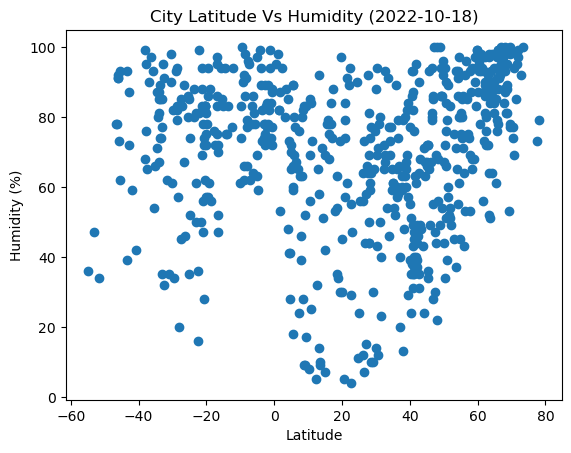

In [27]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

x =city_data_df[["Lat"]]
y = city_data_df[["Humidity"]]
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude Vs Humidity (2022-10-18)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

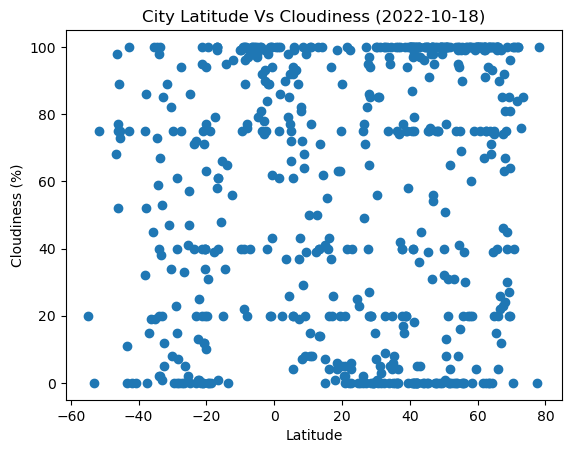

In [30]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

x =city_data_df[["Lat"]]
y = city_data_df[["Cloudiness"]]
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude Vs Cloudiness (2022-10-18)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

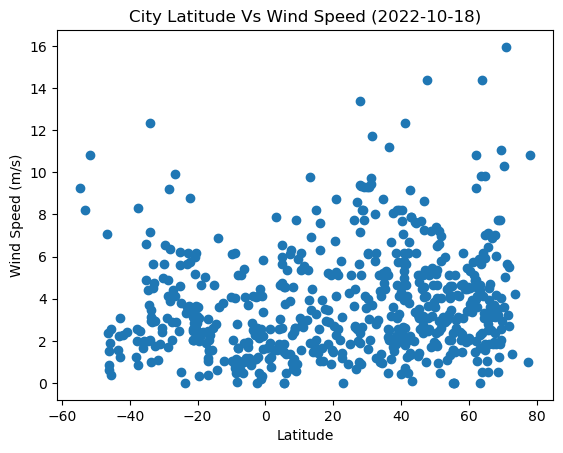

In [31]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

x =city_data_df[["Lat"]]
y = city_data_df[["Wind Speed"]]
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude Vs Wind Speed (2022-10-18)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE



In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,hasaki,35.7333,140.8333,7.90,52,0,5.31,JP,1680539734
8,jamestown,42.0970,-79.2353,15.77,44,0,6.17,US,1680539734
9,sicamous,50.8331,-118.9856,1.77,79,100,0.96,CA,1680539278
10,pevek,69.7008,170.3133,-33.14,100,81,2.92,RU,1680539734
11,barrow,71.2906,-156.7887,-16.99,85,100,5.66,US,1680539734


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tanete,-3.9443,119.7848,23.98,94,81,1.04,ID,1680539277
1,mahebourg,-20.4081,57.7000,26.81,83,40,2.57,MU,1680539733
2,port augusta,-32.5000,137.7667,17.08,32,5,1.73,AU,1680539277
3,punta arenas,-53.1500,-70.9167,16.06,47,0,8.23,CL,1680539733
4,constitucion,-35.3333,-72.4167,19.94,54,100,6.61,CL,1680539733


###  Temperature vs. Latitude Linear Regression Plot

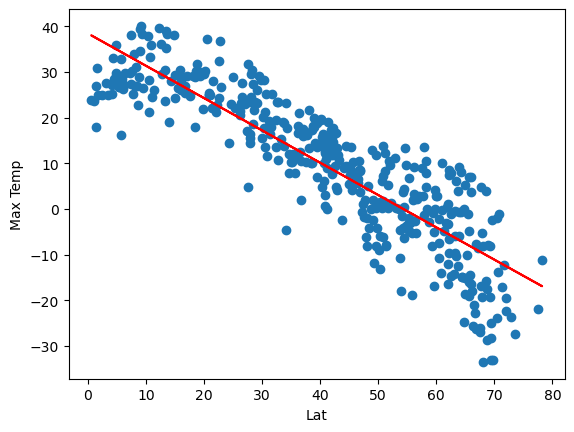

The R-Value is  -0.8791308645004272


In [34]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

y=northern_hemi_df["Max Temp"]
x=northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(25,250),fontsize=15,color="red")

plt.show()
print("The R-Value is ",rvalue)

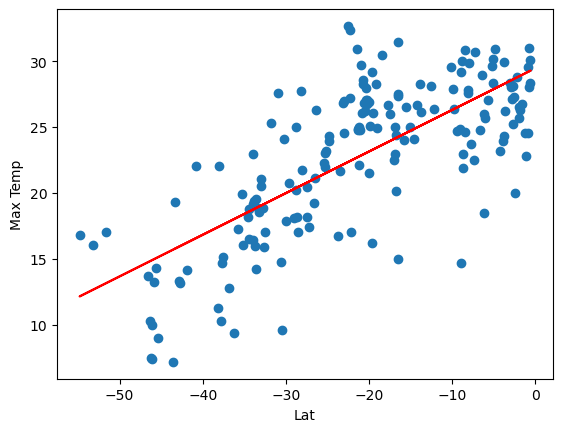

The R-Value is  0.7275553196534852


In [35]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE


y=southern_hemi_df["Max Temp"]
x=southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(-125,270),fontsize=15,color="red")

plt.show()
print("The R-Value is ",rvalue)

**Discussion about the linear relationship:** It seems that tempature increases until the latitude reaches 0, at which point it then begins to decrease linearly. 

### Humidity vs. Latitude Linear Regression Plot

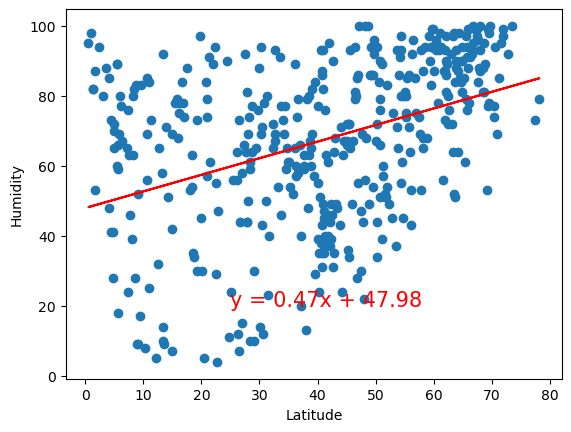

The R-Value is  0.3980885597992209


In [36]:
# Northern Hemisphere
# YOUR CODE HERE

# Linear regression on Northern Hemisphere
# YOUR CODE HERE

y=northern_hemi_df["Humidity"]
x=northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(25,20),fontsize=15,color="red")

plt.show()
print("The R-Value is ",rvalue)

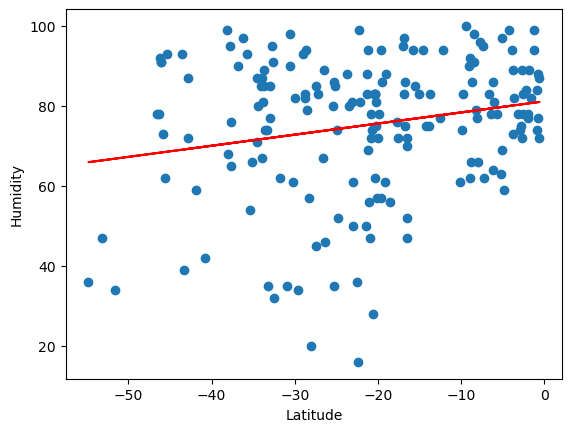

The R-Value is  0.21216246346861722


In [37]:
# Southern Hemisphere
# YOUR CODE HERE

y=southern_hemi_df["Humidity"]
x=southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(25,20),fontsize=15,color="red")

plt.show()
print("The R-Value is ",rvalue)

**Discussion about the linear relationship:** There is a positive relationship between humidity and latitude that is consistent throughout both graphs

### Cloudiness vs. Latitude Linear Regression Plot

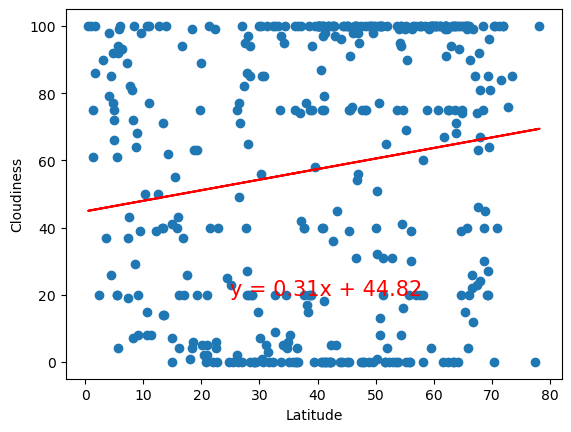

The R-Value is  0.15730731507956558


In [38]:
# Northern Hemisphere
# YOUR CODE HERE

y=northern_hemi_df["Cloudiness"]
x=northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(25,20),fontsize=15,color="red")

plt.show()
print("The R-Value is ",rvalue)

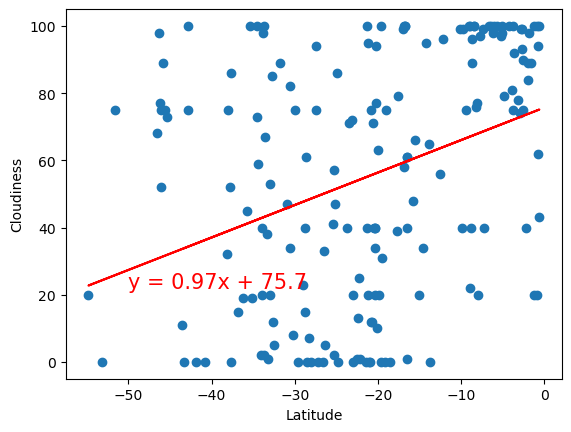

The R-Value is  0.3554614769727129


In [41]:
# Southern Hemisphere
# YOUR CODE HERE

y=southern_hemi_df["Cloudiness"]
x=southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(-50,22),fontsize=15,color="red")

plt.show()
print("The R-Value is ",rvalue)

**Discussion about the linear relationship:** There is a positive relationship between cloudiness and latitude as demonstrated by the two graphs.

### Wind Speed vs. Latitude Linear Regression Plot

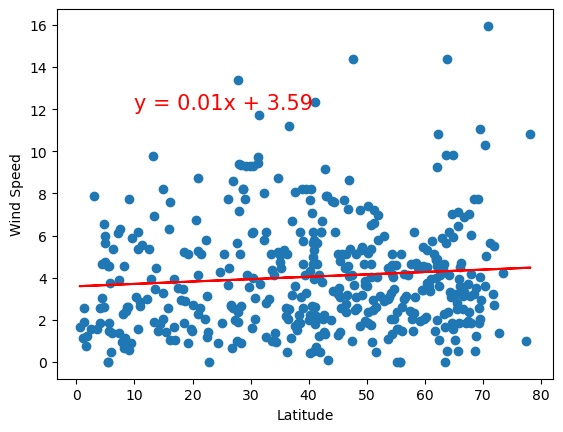

The R-Value is  0.08522745671409923


In [43]:
# Northern Hemisphere
# YOUR CODE HERE

y=northern_hemi_df["Wind Speed"]
x=northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(10,12),fontsize=15,color="red")

plt.show()
print("The R-Value is ",rvalue)

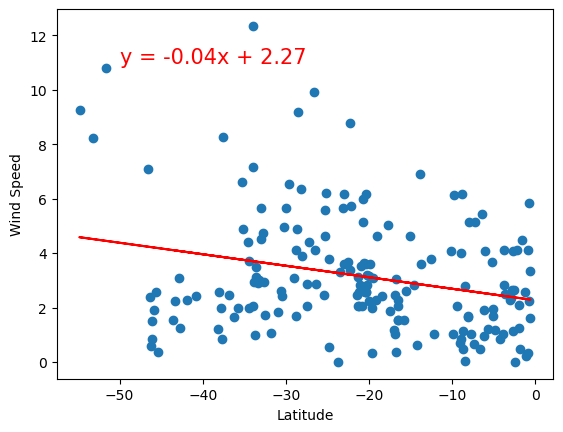

The R-Value is  -0.25943978244960547


In [46]:
# Southern Hemisphere
# YOUR CODE HERE

y=southern_hemi_df["Wind Speed"]
x=southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(-50,11),fontsize=15,color="red")

plt.show()
print("The R-Value is ",rvalue)

**Discussion about the linear relationship:** Given that the lines in both graphs are more or less flat, it's safe to say a strong causal relationship can not be esstablished. 